In [1]:
## Can total PA be predicted by certain variables?
## Potential variables:
# Lineup position
# Team money line
# Game over/under

In [5]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

os.chdir('..')
cwd = os.getcwd()
#os.chdir(cwd + '/Fantasy.2018-2021')

In [69]:
data['PlayerTeamMoneyLine'] = data.apply(lambda row: row['Game.AwayTeamMoneyLine'] if row['HomeOrAway'] == 'AWAY' else row['Game.HomeTeamMoneyLine'], axis=1)
data['PlayerTeamPointSpread'] = data.apply(lambda row: abs(row['Game.PointSpread']) * -1 if row['PlayerTeamMoneyLine'] < 0 else abs(row['Game.PointSpread']), axis=1)
data['PlayerTeamVegasWinProb'] = data.apply(lambda row: 100 / (100 + row['PlayerTeamMoneyLine']) if row['PlayerTeamMoneyLine'] > 0 else row['PlayerTeamMoneyLine'] / (row['PlayerTeamMoneyLine'] - 100), axis=1)
data['PlayerTeamTotal'] = data.apply(lambda row: round((row['Game.OverUnder'] / 2) - ((row['PlayerTeamPointSpread'] * (100 / (abs(row['PlayerTeamMoneyLine']) + 100))) / 2), 2), axis=1)


In [50]:
#os.chdir('..')
Teams = pd.read_csv('Team.2018.csv')
Teams.head()

,TeamID,[Key],Active,City,Name,StadiumID,League,Division,PrimaryColor,SecondaryColor,TertiaryColor,QuaternaryColor,WikipediaLogoUrl,WikipediaWordMarkUrl
0,1,LAD,True,Los Angeles,Dodgers,31.0,NL,West,005A9C,FFFFFF,EF3E42,NaN,https://upload.wikimedia.org/wikipedia/en/a/a0...,https://upload.wikimedia.org/wikipedia/commons...
1,2,CIN,True,Cincinnati,Reds,64.0,NL,Central,C6011F,000000,FFFFFF,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
2,3,TOR,True,Toronto,Blue Jays,89.0,AL,East,134A8E,1D2D5C,E8291C,FFFFFF,https://upload.wikimedia.org/wikipedia/en/6/68...,https://upload.wikimedia.org/wikipedia/en/thum...
3,4,PIT,True,Pittsburgh,Pirates,29.0,NL,Central,000000,FDB827,FFFFFF,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
4,5,KC,True,Kansas City,Royals,33.0,AL,Central,004687,C09A5B,7AB2DD,FFFFFF,https://upload.wikimedia.org/wikipedia/en/1/1c...,https://upload.wikimedia.org/wikipedia/commons...


In [29]:
#os.chdir('..')
#cwd = os.getcwd()
#os.chdir(cwd + '/PitcherListDFS/Fantasy.2018-2021')
teams = pd.read_csv('Team.2018.csv')
teams.head()

,TeamID,[Key],Active,City,Name,StadiumID,League,Division,PrimaryColor,SecondaryColor,TertiaryColor,QuaternaryColor,WikipediaLogoUrl,WikipediaWordMarkUrl
0,1,LAD,True,Los Angeles,Dodgers,31.0,NL,West,005A9C,FFFFFF,EF3E42,NaN,https://upload.wikimedia.org/wikipedia/en/a/a0...,https://upload.wikimedia.org/wikipedia/commons...
1,2,CIN,True,Cincinnati,Reds,64.0,NL,Central,C6011F,000000,FFFFFF,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
2,3,TOR,True,Toronto,Blue Jays,89.0,AL,East,134A8E,1D2D5C,E8291C,FFFFFF,https://upload.wikimedia.org/wikipedia/en/6/68...,https://upload.wikimedia.org/wikipedia/en/thum...
3,4,PIT,True,Pittsburgh,Pirates,29.0,NL,Central,000000,FDB827,FFFFFF,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://upload.wikimedia.org/wikipedia/commons...
4,5,KC,True,Kansas City,Royals,33.0,AL,Central,004687,C09A5B,7AB2DD,FFFFFF,https://upload.wikimedia.org/wikipedia/en/1/1c...,https://upload.wikimedia.org/wikipedia/commons...


In [51]:
Teams = Teams[['TeamID', 'League']]
data = data.merge(Teams, how = 'inner', on = ['TeamID'])
data.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,teamActualOBP,HR/AB,HR/PA,BB%,leadhittersactualOBP,leadhittersactualOBP-HR,R/PA,RBI/PA,trailhittersactualOPS,gameteam,all_starters_act_obp,League
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.25,3,1,1,0,0,0,0,0,0,0.400,0.25,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1000137150639,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1,0.386491,0.319000,0.386491,0.0,0.0,0.200000,0.400000,0.133333,0.000000,0.0,0.407692,50639WSH,0.378378,NL
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.20,4,2,1,0,0,0,0,0,0,0.333,0.40,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1000116850729,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1,0.372039,0.318667,0.372039,0.0,0.0,0.166667,0.473684,0.421053,0.000000,0.0,0.745098,50729WSH,0.416667,NL
2,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.25,3,2,1,0,0,0,0,0,0,0.400,0.50,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1000116850677,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1,0.372039,0.322000,0.372039,0.0,0.0,0.200000,0.333333,0.333333,0.000000,0.0,0.533333,50677WSH,0.352941,NL
3,2184210,35,10000638,1,2018,Howie Kendrick,WSH,2B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,4.0,5,1,2,2,0,0,0,0,0.40,3,0,1,0,0,0,1,0,0,0.500,0.40,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.2,10,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.666667,1.535714,1.770,0.82,28,1.714608,0.694,1.056,0.331,0.026,0.122,0.406,0.079,0.596,0.097,1000063850729,0.375,5,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.067322,1.548294,0.554981,0.082702,1,0.389594,0.336667,0.389594,0.0,0.0,0.166667,0.555556,0.500000,0.166667,0.0,0.686275,50729WSH,0.416667,NL
4,2185648,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50743,26,ATL,4/9/18,4/9/18 19:05,HOME,1,0.0,4,0,0,0,0,0,0,0,0.00,4,2,0,0,0,0,0,0,0,0.000,0.00,0.000,0,0,0,0.0,0,0,0,0.0,0,0

In [12]:
# Should remove pitchers from the data set
data = data.loc[data.PositionCategory != 'P'].reset_index(drop=True)
data = data.loc[data.Started == 1].reset_index(drop=True)
#data = data.loc[data.Season != 2020].reset_index(drop=True)
#data.describe()

In [78]:
game_obp_dict = {}
gameids = list(data.GameID.unique())
for game in gameids:
    
    game_df = data[data.GameID == game].reset_index(drop=True)
    teams = list(data.Team.unique())
    for team in teams:
        team_df = game_df[game_df.Team == team].reset_index(drop=True)
        team_df = team_df[['PA', 'pS', 'pD', 'pT', 'pHR', 'pBB', 'pHP']]
        team_df = team_df.dropna()
        OB_events = team_df.pS.sum() + team_df.pD.sum() + team_df['pT'].sum() + team_df.pHR.sum() + team_df.pBB.sum() + team_df.pHP.sum()
        denominator_PA = team_df.PA.sum()
        if denominator_PA == 0: continue
        else:
            tOBP = OB_events / denominator_PA

        gameteam = str(game) + str(team)
        game_obp_dict[gameteam] = tOBP

In [81]:
#data['gameteam'] = data.apply(lambda row: str(row['GameID']) + str(row['Team']), axis=1)
data['all_starters_proj_obp'] = data.apply(lambda row: game_obp_dict[row['gameteam']] if row['gameteam'] in game_obp_dict else 0, axis=1)
data.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,teamActualOBP,HR/AB,HR/PA,BB%,leadhittersactualOBP,leadhittersactualOBP-HR,R/PA,RBI/PA,trailhittersactualOPS,gameteam,all_starters_act_obp,League,all_starters_proj_obp
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.25,3,1,1,0,0,0,0,0,0,0.400,0.25,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1000137150639,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1,0.386491,0.319000,0.386491,0.0,0.0,0.200000,0.400000,0.133333,0.000000,0.0,0.407692,50639WSH,0.378378,NL,0.366640
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.20,4,2,1,0,0,0,0,0,0,0.333,0.40,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1000116850729,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1,0.372039,0.318667,0.372039,0.0,0.0,0.166667,0.473684,0.421053,0.000000,0.0,0.745098,50729WSH,0.416667,NL,0.370000
2,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.25,3,2,1,0,0,0,0,0,0,0.400,0.50,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1000116850677,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1,0.372039,0.322000,0.372039,0.0,0.0,0.200000,0.333333,0.333333,0.000000,0.0,0.533333,50677WSH,0.352941,NL,0.367000
3,2184210,35,10000638,1,2018,Howie Kendrick,WSH,2B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,4.0,5,1,2,2,0,0,0,0,0.40,3,0,1,0,0,0,1,0,0,0.500,0.40,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.2,10,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.666667,1.535714,1.770,0.82,28,1.714608,0.694,1.056,0.331,0.026,0.122,0.406,0.079,0.596,0.097,1000063850729,0.375,5,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.067322,1.548294,0.554981,0.082702,1,0.389594,0.336667,0.389594,0.0,0.0,0.166667,0.555556,0.500000,0.166667,0.0,0.686275,50729WSH,0.416667,NL,0.370000
4,2185648,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50743,26,ATL,4/9/18,4/9/18 19:05,HOME,1,0.0,4,0,0,0,0,0,0,0,0.00,

In [37]:
OB_events = team_df.S.sum() + team_df.D.sum() + team_df['T'].sum() + team_df.HR.sum() + team_df.BB.sum() + team_df.HP.sum()
OB_events

14

In [82]:
# Could incorporate AL/NL indicator

reg_data = data[['PA', 'battingorderposition', 'PlayerTeamTotal', 'all_starters_act_obp']]
reg_data = reg_data.dropna()

x = reg_data[['battingorderposition', 'PlayerTeamTotal', 'all_starters_act_obp']]
# = pd.get_dummies(data=x, drop_first=True)
y = reg_data[['PA']]
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
#x.head()

In [83]:
reg_data.corr()

,PA,battingorderposition,PlayerTeamTotal,all_starters_act_obp
PA,1.000000,-0.372081,0.108194,0.430843
battingorderposition,-0.372081,1.000000,0.010461,-0.004762
PlayerTeamTotal,0.108194,0.010461,1.000000,0.191756
all_starters_act_obp,0.430843,-0.004762,0.191756,1.000000


In [84]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
 
model = mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_test)

In [85]:
print(mlr.intercept_)

[3.29545714]


In [86]:
print(mlr.coef_)

[[-0.12091902  0.03583897  3.92218611]]


In [87]:
print(model.score(x_train, y_train))

0.3224877217380141


In [88]:
data['pPA+'] = data.apply(lambda row: mlr.intercept_[0] + (mlr.coef_[0][0] * row['battingorderposition']) + (mlr.coef_[0][1] * row['PlayerTeamTotal']) + (mlr.coef_[0][2] * row['all_starters_proj_obp']) if row['Started'] == 1 else 0, axis=1)

data.head()


,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,teamActualOBP,HR/AB,HR/PA,BB%,leadhittersactualOBP,leadhittersactualOBP-HR,R/PA,RBI/PA,trailhittersactualOPS,gameteam,all_starters_act_obp,League,all_starters_proj_obp,pPA+
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.25,3,1,1,0,0,0,0,0,0,0.400,0.25,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1000137150639,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1,0.386491,0.319000,0.386491,0.0,0.0,0.200000,0.400000,0.133333,0.000000,0.0,0.407692,50639WSH,0.378378,NL,0.366640,4.413954
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.20,4,2,1,0,0,0,0,0,0,0.333,0.40,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1000116850729,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1,0.372039,0.318667,0.372039,0.0,0.0,0.166667,0.473684,0.421053,0.000000,0.0,0.745098,50729WSH,0.416667,NL,0.370000,4.416022
2,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.25,3,2,1,0,0,0,0,0,0,0.400,0.50,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1000116850677,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1,0.372039,0.322000,0.372039,0.0,0.0,0.200000,0.333333,0.333333,0.000000,0.0,0.533333,50677WSH,0.352941,NL,0.367000,4.403539
3,2184210,35,10000638,1,2018,Howie Kendrick,WSH,2B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,4.0,5,1,2,2,0,0,0,0,0.40,3,0,1,0,0,0,1,0,0,0.500,0.40,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.2,10,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.666667,1.535714,1.770,0.82,28,1.714608,0.694,1.056,0.331,0.026,0.122,0.406,0.079,0.596,0.097,1000063850729,0.375,5,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.067322,1.548294,0.554981,0.082702,1,0.389594,0.336667,0.389594,0.0,0.0,0.166667,0.555556,0.500000,0.166667,0.0,0.686275,50729WSH,0.416667,NL,0.370000,4.295103
4,2185648,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50743,26,ATL,4/9/18,4/9/

In [89]:
data.to_csv('blurgh.csv', index=False)

In [130]:
data['borderthird'] = data.apply(lambda row: 1 if (row['battingorderposition'] == 3 or row['battingorderposition'] == 4 or row['battingorderposition'] == 5) else (2 if (row['battingorderposition'] == 6 or row['battingorderposition'] == 7 or row['battingorderposition'] == 8) else 3), axis=1)
data.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.250,3,1,1,0,0,0,0,0,0,0.400,0.250,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1.000140e+12,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.200,4,2,1,0,0,0,0,0,0,0.333,0.400,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1.000120e+12,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1
2,2852256,30,10000719,1,2019,Martin Maldonado,HOU,C,IF,1,NaN,56217,32,MIL,9/2/19,9/2/19 16:10,AWAY,1,2.0,4,0,1,0,1,0,0,0,0.250,3,1,0,0,0,0,0,0,0,0.250,0.500,0.750,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.250000,1.407975,1.448,0.80,326,1.416915,0.421,0.487,0.170,0.007,0.109,0.280,0.077,0.322,0.002,1.000070e+12,0.377,8,10000970.0,10005264.0,1.5,8.5,-175.0,160.0,-175.0,-1.5,0.636364,4.52,3.735279,1.199024,0.395693,0.101786,2
3,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.250,3,2,1,0,0,0,0,0,0,0.400,0.500,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1.000120e+12,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1
4,2690138,1,10001091,1,2019,Chris Taylor,LAD,LF,OF,1,NaN,54960,18,NYM,5/28/19,5/28/19 22:10,HOME,1,1.0,3,0,1,1,0,0,0,0,0.333,2,1,0,0,0,0,0,0,0,0.333,0.333,0.666,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,3.0,3,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.000000,1.680272,1.884,0.82,147,1.796757,0.360,0.397,0.166,0.030,0.087,0.267,0.027,0.355,0.049,1.000110e+12,0.376,5,10003259.0,10000839.0,-1.5,8.0,173.0,-193.0,-193.0,-1.5,0.658703,4.26,4.065932,1.581647,0.575360,0.117912,1


In [49]:
from scipy.stats import pearsonr

mini_df = data[['PA', 'pPA']]
mini_df = mini_df.dropna()

pPA = list(mini_df.pPA)
aPA = list(mini_df.PA)

corrPA, predPA = pearsonr(aPA, pPA)
corrPA

0.388595907013761

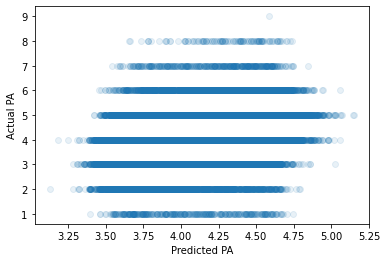

In [51]:
import matplotlib.pyplot as plt

plt.scatter(pPA, aPA, alpha=0.1)
plt.xlabel('Predicted PA')
plt.ylabel('Actual PA')
plt.show()

In [7]:
data['HR/AB'] = data.apply(lambda row: row['HR'] / row['AB'] if row['AB'] > 0 else 0, axis=1)
data['HR/PA'] = data.apply(lambda row: row['HR'] / row['PA'] if row['PA'] > 0 else 0, axis=1)
data['BB%'] = data.apply(lambda row: row['BB'] / row['PA'] if row['PA'] > 0 else 0, axis=1)
data.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,HR/AB,HR/PA,BB%
0,2841405,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56135,21,LAA,8/27/19,8/27/19 22:07,AWAY,1,0.0,3,0,0,0,0,0,0,0,0.000,3,2,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,1.000000,1.371,0.66,226,1.204361,0.241,0.373,0.124,0.015,0.034,0.213,0.008,0.213,0.013,1.000070e+12,0.324,9,10000060.0,10000555.0,-1.5,8.0,150.0,-160.0,150.0,1.5,0.400000,3.70,3.499000,0.935399,0.227098,0.039655,3,0.372100,0.255667,0.0,0.0,0.0
1,2856054,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56239,29,NYY,9/4/19,9/4/19 18:35,AWAY,1,0.0,2,0,0,0,0,0,0,0,0.000,2,2,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.000000,0.965812,1.371,0.66,234,1.186770,0.158,0.244,0.082,0.010,0.022,0.139,0.005,0.140,0.008,1.000070e+12,0.320,9,10001154.0,10006987.0,-1.5,9.5,150.0,-160.0,150.0,1.5,0.400000,4.45,3.603279,0.947662,0.227757,0.039636,3,0.372100,0.251000,0.0,0.0,0.0
2,2325919,19,10000082,1,2018,Jace Peterson,BAL,SS,IF,1,NaN,51578,25,BOS,6/11/18,6/11/18 19:05,HOME,1,4.0,4,0,1,1,0,0,0,0,0.250,3,2,1,0,0,0,0,1,0,0.400,0.250,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.0,10,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.000000,1.426087,1.569,0.79,115,1.494807,0.443,0.677,0.203,0.030,0.050,0.606,0.055,0.442,0.119,1.000010e+12,0.314,9,10000161.0,10000095.0,1.5,8.5,-133.0,123.0,123.0,1.5,0.448430,3.91,3.528198,0.968843,0.228441,0.035282,3,0.402189,0.324200,0.0,0.0,0.2
3,2866502,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56312,11,TB,9/10/19,9/10/19 20:05,HOME,1,0.0,4,0,0,0,0,0,0,0,0.000,4,3,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.000000,0.970833,1.371,0.66,240,1.180256,0.313,0.482,0.167,0.020,0.044,0.275,0.011,0.284,0.016,1.000070e+12,0.328,9,10006184.0,10001154.0,1.5,9.0,-135.0,125.0,125.0,1.5,0.444444,4.17,3.564348,0.937424,0.229763,0.039208,3,0.372100,0.249750,0.0,0.0,0.0
4,2433207,20,10001567,1,2018,Bobby Wilson,MIN,C,IF,1,NaN,52323,10,CLE,8/9/18,8/9/18 13:10,AWAY,1,2.0,3,1,1,1,0,0,0,0,0.333,2,0,0,0,0,0,0,0,0,0.333,0.333,0.666,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.2,5,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.666667,1.097015,1.524,0.55,134,1.312482,0.268,0.376,0.120,0.000,0.051,0.208,0.016,0.343,0.007,1.000160e+12,0.318,9,10001993.0,10000335.0,-1.5,7.5,195.0,-215.0,195.0,1.5,0.338983,3.50,3.471193,0.948793,0.231248,0.059010,3,0.393968,0.257000,0.0,0.0,0.0


In [59]:
## Predicting Runs and RBI's
#, 'teamProjectedOBP', 'pITB', 'pHR+'


reg_data = data[['RBI/PA', 'HR/PA', 'leadhittersactualOBP-HR', 'BattingAverage']]
reg_data = reg_data.dropna()

x = reg_data[['HR/PA', 'leadhittersactualOBP-HR', 'BattingAverage']]
y = reg_data[['RBI/PA']]
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [60]:
reg_data.corr()

,RBI/PA,HR/PA,leadhittersactualOBP-HR,BattingAverage
RBI/PA,1.000000,0.662002,0.221058,0.440236
HR/PA,0.662002,1.000000,0.012658,0.338722
leadhittersactualOBP-HR,0.221058,0.012658,1.000000,0.031897
BattingAverage,0.440236,0.338722,0.031897,1.000000


In [61]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
 
model = mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_test)

In [62]:
print(mlr.intercept_)

[-0.0657635]


In [63]:
print(mlr.coef_)

[[1.29608433 0.30109139 0.20209429]]


In [64]:
print(model.score(x_train, y_train))

0.5325609498733841


In [ ]:
data['pRBI+'] = data.apply(lambda row: mlr.intercept_[0] + (mlr.coef_[0][0] * (row['pHR'] / row[''])) + (mlr.coef_[0][1] * row['pHR']) + (mlr.coef_[0][2] * row['all_starters_proj_obp']) if row['Started'] == 1 else 0, axis=1)

data.head()

In [12]:
data['RBI/PA'] = data.apply(lambda row: row['RBI'] / row['PA'], axis=1)

In [143]:
data['SLG-HR'] = data.apply(lambda row: (row['S'] + (2 * row['D']) + (3 * row['T'])) / (row['AB'] - row['HR']) if row['AB'] - row['HR'] > 0 else 0 , axis=1)
data

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,teamActualOBP,HR/AB,HR/PA,BB%,leadhittersactualOBP,leadhittersactualOBP-HR,R/PA,RBI/PA,trailhittersactualOPS,gameteam,all_starters_act_obp,League,all_starters_proj_obp,pPA+,R-HR/PA,OBP-HR,RBI-HR/PA,SLG-HR
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.250,3,1,1,0,0,0,0,0,0,0.400,0.250,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1000137150639,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1,0.386491,0.319000,0.386491,0.0,0.0,0.200000,0.400000,0.133333,0.000000,0.0,0.407692,50639WSH,0.378378,NL,0.366640,4.413954,0.000000,0.400000,0.0,0.250000
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.200,4,2,1,0,0,0,0,0,0,0.333,0.400,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1000116850729,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1,0.372039,0.318667,0.372039,0.0,0.0,0.166667,0.473684,0.421053,0.000000,0.0,0.745098,50729WSH,0.416667,NL,0.370000,4.416022,0.000000,0.333333,0.0,0.400000
2,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.250,3,2,1,0,0,0,0,0,0,0.400,0.500,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1000116850677,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1,0.372039,0.322000,0.372039,0.0,0.0,0.200000,0.333333,0.333333,0.000000,0.0,0.533333,50677WSH,0.352941,NL,0.367000,4.403539,0.000000,0.400000,0.0,0.500000
3,2184210,35,10000638,1,2018,Howie Kendrick,WSH,2B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,4.0,5,1,2,2,0,0,0,0,0.400,3,0,1,0,0,0,1,0,0,0.500,0.400,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.2,10,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.666667,1.535714,1.770,0.82,28,1.714608,0.694,1.056,0.331,0.026,0.122,0.406,0.079,0.596,0.097,1000063850729,0.375,5,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.067322,1.548294,0.554981,0.082702,1,0.389594,0.336667,0.389594,0.0,0.0,0.166667,0.555556,0.500000,0.166667,0.0

In [66]:
data['OBP-HR'] = data.apply(lambda row: (row['S'] + row['D'] + row['T'] + row['BB'] + row['HP']) / row['PA'], axis=1)
data['R-HR/PA'] = data.apply(lambda row: (data['R'] - data['HR']) / row['PA'], axis=1) 

KeyboardInterrupt: 

In [73]:
## Runs
## This should be R/PA = HR/PA + (result of a regression)

reg_data = data[['R/PA', 'OBP-HR', 'trailhittersactualOPS', 'battingorderposition']]
reg_data = reg_data.dropna()

x = reg_data[['OBP-HR', 'trailhittersactualOPS', 'battingorderposition']]
y = reg_data[['R/PA']]
 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [74]:
reg_data.corr()

,R/PA,OBP-HR,trailhittersactualOPS,battingorderposition
R/PA,1.000000,0.323052,0.259271,-0.081464
OBP-HR,0.323052,1.000000,0.033257,-0.054882
trailhittersactualOPS,0.259271,0.033257,1.000000,-0.040676
battingorderposition,-0.081464,-0.054882,-0.040676,1.000000


In [75]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
 
model = mlr.fit(x_train, y_train)
y_predicted = mlr.predict(x_test)

In [76]:
print(mlr.intercept_)

[0.00175225]


In [77]:
print(mlr.coef_)

[[ 0.21940387  0.09660168 -0.00360286]]


In [78]:
print(model.score(x_train, y_train))

0.16917264951070599


In [384]:
#data['R/PA'] = data.apply(lambda row: row['R'] / row['PA'] if row['PA'] > 0 else 0, axis=1)
#data['RBI/PA'] = data.apply(lambda row: row['RBI'] / row['PA'] if row['PA'] > 0 else 0, axis=1)
data = data[data['Started'] == 1]



In [8]:
## Calculate projected team SLG prior to the current game

#gameid = data.loc[1]['GameID']
#teamid = data.loc[1]['TeamID']
#playerid = data.loc[1]['PlayerID']
#sub_df = data[(data['GameID'] == gameid) & (data['TeamID'] == teamid) & (data['Started'] == 1) & (data['PlayerID'] != playerid)].reset_index(drop=True)
#sub_df = sub_df[sub_df.BlendedProjDKPPA.notna()].reset_index(drop=True)
#tOBP = (sub_df.pS.sum() + sub_df.pD.sum() + sub_df.pT.sum() + sub_df.pHR.sum() + sub_df.pBB.sum() + sub_df.pHP.sum()) / sub_df.PA.sum()
#tOBP

tOPS_dict = {}

for index, row in data.iterrows():
    
    playergameid = row['playergameID']
    gameid = row['GameID']
    teamid = row['TeamID']
    playerid = row['PlayerID']
    b_order = row['battingorderposition']
    lead_hitters = []
    
    if b_order > 3:
        lead_hitters = [b_order - 1, b_order - 2, b_order - 3]
    elif b_order == 3: lead_hitters = [9, 2, 1]
    elif b_order == 2: lead_hitters = [9, 8, 1]
    else:
        lead_hitters = [7, 8, 9]
    
    
    sub_df = data[(data['GameID'] == gameid) & (data['TeamID'] == teamid) & (data['Started'] == 1) & (data['PlayerID'] != playerid)].reset_index(drop=True)
    boolean_series = sub_df.battingorderposition.isin(lead_hitters)
    filtered_df = sub_df[boolean_series]
    #sub_df = sub_df[sub_df.BlendedProjDKPPA.notna()].reset_index(drop=True)
    OB_events = filtered_df.S.sum() + filtered_df.D.sum() + filtered_df['T'].sum() + filtered_df.BB.sum() + filtered_df.HP.sum()
    #SLG_events = filtered_df.S.sum() + (2 * filtered_df.D.sum()) + (3 * filtered_df['T'].sum()) + (4 * filtered_df.HR.sum())
    denominator_PA = filtered_df.PA.sum()
    #denominator_AB = filtered_df.AB.sum()
    if denominator_PA == 0: continue
    else:
        tOBP = OB_events / denominator_PA
        
    #if denominator_AB == 0: continue
    #else:
     #   tSLG = SLG_events / denominator_AB
        
    tOPS = tOBP
    
    tOPS_dict[playergameid] = tOPS

In [9]:
data['leadhittersOBP-HR'] = data.apply(lambda row: tOPS_dict[row['playergameID']] if row['playergameID'] in tOPS_dict else np.NaN, axis=1)
data.head()


,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP,HR/AB,HR/PA,BB%,leadhittersOBP-HR
0,2841405,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56135,21,LAA,8/27/19,8/27/19 22:07,AWAY,1,0.0,3,0,0,0,0,0,0,0,0.000,3,2,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.000000,1.000000,1.371,0.66,226,1.204361,0.241,0.373,0.124,0.015,0.034,0.213,0.008,0.213,0.013,1.000070e+12,0.324,9,10000060.0,10000555.0,-1.5,8.0,150.0,-160.0,150.0,1.5,0.400000,3.70,3.499000,0.935399,0.227098,0.039655,3,0.372100,0.255667,0.0,0.0,0.0,0.333333
1,2856054,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56239,29,NYY,9/4/19,9/4/19 18:35,AWAY,1,0.0,2,0,0,0,0,0,0,0,0.000,2,2,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.000000,0.965812,1.371,0.66,234,1.186770,0.158,0.244,0.082,0.010,0.022,0.139,0.005,0.140,0.008,1.000070e+12,0.320,9,10001154.0,10006987.0,-1.5,9.5,150.0,-160.0,150.0,1.5,0.400000,4.45,3.603279,0.947662,0.227757,0.039636,3,0.372100,0.251000,0.0,0.0,0.0,0.333333
2,2325919,19,10000082,1,2018,Jace Peterson,BAL,SS,IF,1,NaN,51578,25,BOS,6/11/18,6/11/18 19:05,HOME,1,4.0,4,0,1,1,0,0,0,0,0.250,3,2,1,0,0,0,0,1,0,0.400,0.250,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,12.0,10,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,2.000000,1.426087,1.569,0.79,115,1.494807,0.443,0.677,0.203,0.030,0.050,0.606,0.055,0.442,0.119,1.000010e+12,0.314,9,10000161.0,10000095.0,1.5,8.5,-133.0,123.0,123.0,1.5,0.448430,3.91,3.528198,0.968843,0.228441,0.035282,3,0.402189,0.324200,0.0,0.0,0.2,0.111111
3,2866502,28,10000674,1,2019,Jeff Mathis,TEX,C,IF,1,NaN,56312,11,TB,9/10/19,9/10/19 20:05,HOME,1,0.0,4,0,0,0,0,0,0,0,0.000,4,3,0,0,0,0,0,0,0,0.000,0.000,0.000,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.000000,0.970833,1.371,0.66,240,1.180256,0.313,0.482,0.167,0.020,0.044,0.275,0.011,0.284,0.016,1.000070e+12,0.328,9,10006184.0,10001154.0,1.5,9.0,-135.0,125.0,125.0,1.5,0.444444,4.17,3.564348,0.937424,0.229763,0.039208,3,0.372100,0.249750,0.0,0.0,0.0,0.333333
4,2433207,20,10001567,1,2018,Bobby Wilson,MIN,C,IF,1,NaN,52323,10,CLE,8/9/18,8/9/18 13:10,AWAY,1,2.0,3,1,1,1,0,0,0,0,0.333,2,0,0,0,0,0,0,0,0,0.333,0.333,0.666,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.2,5,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.666667,1.097015,1.524,0.55,134,1.312482,0.268,0.376,0.120,0.000,0.051,0.208,0.016,0.343,0.007,1.000160e+12,0.318,9,10001993.0,10000335.0,-1.5,7.5,195.0,-215.0,195.0,1.5,0.338983,3.50,3.471193,0.948793,0.231248,0.059010,3,0.393968,0.257000,0.0,0.0,0.0,0.222222


In [143]:
data['pOBP'] = data.apply(lambda row: (row['pS'] + row['pD'] + row['pT'] + row['pHR'] + row['pBB'] + row['pHP']) / row['PA'], axis=1)
data.head()

,StatID,TeamID,PlayerID,SeasonType,Season,Name,Team,Position,PositionCategory,Started,InjuryStatus,GameID,OpponentID,Opponent,Day,DateTime,HomeOrAway,Games,FantasyPoints,AB,R,H,S,D,T,HR,RBI,BattingAverage,Outs,SO,BB,HP,Sacrifices,SacrificeFlies,GroundIntoDoublePlay,SB,CS,OnBasePercentage,SluggingPercentage,OnBasePlusSlugging,Wins,Losses,Saves,InningsPitchedDecimal,TotalOutsPitched,InningsPitchedFull,InningsPitchedOuts,EarnedRunAverage,PitchingHits,PitchingRuns,PitchingEarnedRuns,PitchingWalks,PitchingStrikeouts,PitchingHomeRuns,PitchesThrown,PitchesThrownStrikes,WalksHitsPerInningsPitched,PitchingBattingAverageAgainst,FantasyPointsFanDuel,FantasyPointsDraftKings,WeightedOnBasePercentage,PitchingCompleteGames,PitchingShutOuts,PitchingOnBasePercentage,PitchingSluggingPercentage,PitchingOnBasePlusSlugging,PitchingStrikeoutsPerNineInnings,PitchingWalksPerNineInnings,PitchingWeightedOnBasePercentage,PA,DraftKingsPointsPerPAActual,InSeasonProjDKPPA,PreSeasonProjDKPPA,Reliability,TotalSeasonPA,BlendedProjDKPPA,pR,pS,pD,pT,pHR,pBB,pHP,pRBI,pSB,playergameID,teamProjectedOBP,battingorderposition,Game.AwayTeamStartingPitcherID,Game.HomeTeamStartingPitcherID,Game.PointSpread,Game.OverUnder,Game.AwayTeamMoneyLine,Game.HomeTeamMoneyLine,PlayerTeamMoneyLine,PlayerTeamPointSpread,PlayerTeamVegasWinProb,PlayerTeamTotal,pPA,pITB,pRBI+,pHR+,borderthird,teamProjectedSLG,pOBP
0,2168120,35,10001371,1,2018,Ryan Zimmerman,WSH,1B,IF,1,NaN,50639,2,CIN,4/1/18,4/1/18 16:10,AWAY,1,2.0,4,0,1,1,0,0,0,0,0.250,3,1,1,0,0,0,0,0,0,0.400,0.250,0.650,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.000000,0.800000,1.933,0.83,5,1.911158,0.671,0.661,0.252,0.009,0.236,0.375,0.062,0.770,0.024,1.000140e+12,0.379,4,10001337.0,10005294.0,1.5,8.5,-128.0,118.0,-128.0,-1.5,0.561404,4.58,4.232691,1.808206,0.667912,0.199783,1,0.386491,0.319000
1,2184209,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50729,18,NYM,4/8/18,4/8/18 20:08,HOME,1,3.0,5,0,1,0,1,0,0,0,0.200,4,2,1,0,0,0,0,0,0,0.333,0.400,0.733,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.166667,2.357143,1.899,0.76,14,1.928605,0.735,0.753,0.334,0.014,0.300,0.484,0.027,0.954,0.026,1.000120e+12,0.378,4,10000794.0,10001345.0,-1.5,8.0,167.0,-174.0,-174.0,-1.5,0.635036,4.27,4.189590,1.859479,0.685271,0.209479,1,0.372039,0.318667
2,2852256,30,10000719,1,2019,Martin Maldonado,HOU,C,IF,1,NaN,56217,32,MIL,9/2/19,9/2/19 16:10,AWAY,1,2.0,4,0,1,0,1,0,0,0,0.250,3,1,0,0,0,0,0,0,0,0.250,0.500,0.750,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,6.0,5,0.250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4,1.250000,1.407975,1.448,0.80,326,1.416915,0.421,0.487,0.170,0.007,0.109,0.280,0.077,0.322,0.002,1.000070e+12,0.377,8,10000970.0,10005264.0,1.5,8.5,-175.0,160.0,-175.0,-1.5,0.636364,4.52,3.735279,1.199024,0.395693,0.101786,2,0.372100,0.282500
3,2174867,35,10001168,1,2018,Matt Adams,WSH,1B,IF,1,NaN,50677,26,ATL,4/4/18,4/4/18 12:10,AWAY,1,3.0,4,0,1,0,1,0,0,0,0.250,3,2,1,0,0,0,0,0,0,0.400,0.500,0.900,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,9.0,7,0.400,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5,1.400000,3.714286,1.899,0.76,7,1.969751,0.628,0.644,0.276,0.012,0.261,0.394,0.023,0.815,0.022,1.000120e+12,0.376,4,10000426.0,10000466.0,1.5,8.0,-200.0,185.0,-200.0,-1.5,0.666667,4.25,4.186809,1.905835,0.700292,0.218551,1,0.372039,0.322000
4,2690138,1,10001091,1,2019,Chris Taylor,LAD,LF,OF,1,NaN,54960,18,NYM,5/28/19,5/28/19 22:10,HOME,1,1.0,3,0,1,1,0,0,0,0,0.333,2,1,0,0,0,0,0,0,0,0.333,0.333,0.666,0,0,0,0.0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,3.0,3,0.333,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,1.000000,1.680272,1.884,0.82,147,1.796757,0.360,0.397,0.166,0.030,0.087,0.267,0.027,0.355,0.049,1.000110e+12,0.376,5,10003259.0,10000839.0,-1.5,8.0,173.0,-193.0,-193.0,-1.5,0.658703,4.26,4.065932,1.581647,0.575360,0.117912,1,0.396672,0.324667


In [174]:
data.to_csv('masterdatafile.csv', index=False)

In [308]:
data['playergameID'] = data.apply(lambda row: str(row['PlayerID']) + str(row['GameID']), axis=1)

In [28]:
data = pd.read_csv('regression_testing_csv.csv')